# Byzantine
## Goal:
* Discover drivers

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics

# acquire
from pydataset import data
import seaborn as sns

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pydataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(123)

# Acquire
* Data acquired from kaggle
* 7 columns and 95 rows
* Each row represents one emperor
* Each column represents a feature describing that emperor

# Prepare
* Renamed columns to promote readability

# Data Dictionary
| Feature | Definition |
| :- | :- |
|Start_of_reign| The year the emperor became emperor|
|End_of_reign| The year the emperor stopped being emperor|
|Year_of_birth| The year the emperor was born|
|Year_of_death| The year when the emperor died|
|Location_of_birth| Where the emperor was born|
|Location_of_death| Where the emperor died|
|Cause_of_death| What caused the emperors death|
|Dynasty| The name of the dynasty the emperor belonged to|
|Length_of_reign| How long the emperor ruled|

In [2]:
# Acquire data from kaggle csv
df = pd.read_csv('ByzantineEmperors.csv', index_col=0)
df.head()

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dinasty
Name,,,,,,,,
Constantine I,306,337,280,337,Moesia,Bithynia,Natural Causes,Constantinian
Constantine II,337,361,317,361,Pannonia,Cilicia,Natural Causes,Constantinian
Julian,361,363,331,363,Constantinople,Mesopotamia,Died on Campaign,Constantinian
Jovian,363,364,331,364,Moesia,Bithynia,?,non-dynastic
Valentinian I,364,375,321,375,Panonia,Panonia,Natural Causes,Valentinian


In [3]:
df = df.rename(columns={'Dinasty': 'Dynasty'})

In [4]:
def prepare_byzantine(df):
    # add a column that measures the length of an emerors reign
    df['Length_of_reign'] = (df['End_of_reign']-df['Start_of_reign'])
    # Rename a column
    df = df.rename(columns={'Dinasty': 'Dynasty'})

In [5]:
prepare_byzantine(df)

In [6]:
df['Length_of_reign'] = (df['End_of_reign']-df['Start_of_reign'])

In [7]:
df

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dynasty,Length_of_reign
Name,,,,,,,,,
Constantine I,306,337,280,337,Moesia,Bithynia,Natural Causes,Constantinian,31
Constantine II,337,361,317,361,Pannonia,Cilicia,Natural Causes,Constantinian,24
Julian,361,363,331,363,Constantinople,Mesopotamia,Died on Campaign,Constantinian,2
Jovian,363,364,331,364,Moesia,Bithynia,?,non-dynastic,1
Valentinian I,364,375,321,375,Panonia,Panonia,Natural Causes,Valentinian,11
Valens,364,378,328,378,Panonia,Adrianopole,Died on Campaign,Valentinian,14
Gratian,378,379,359,383,Panonia,Gallia,Murder,Valentinian,1
Theodosius I,379,395,347,395,Hispania,Mediolanum,Natural Causes,Theodosian,16
Arcadius,395,408,377,408,Hispania,Constantinople,Natural Causes,Theodosian,13


In [8]:
# 95 emperors in total
len(df)

95

In [9]:
# The average length of reign is 13 years
df['Length_of_reign'].sum() / len(df)

13.189473684210526

In [10]:
# 25 unique places of birth discounting ?
len(df['Location_of_birth'].unique())

26

In [11]:
# list of all emperors that have a unknown birth location
df[df['Location_of_birth'] == '?']

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dynasty,Length_of_reign
Name,,,,,,,,,
Leo II,474,474,467,474,?,Constantinople,?,Leonid,0
Basiliscus,475,476,?,476,?,Limnae,Other Emperor,Leonid,1
Tiberius II,578,582,520,582,?,Constantinople,Natural Causes,Justinian,4
Constantine III,641,641,612,641,?,?,Illness,Heraclian,0
Philippicus,711,713,?,713,?,Pergamum,Mutilated and Deposed,non-dynastic,2
Anastasios II,713,715,?,719,?,Constantinople,Mutilated and Deposed,non-dynastic,2
Theodosius III,715,717,?,?,?,Ephesus,Mutilated and Deposed,non-dynastic,2
Leo IV,775,780,750,780,?,?,Natural Causes,Isaurian,5
Constantine VI,780,797,771,797,?,?,Mutilated and Deposed,Isaurian,17


In [12]:
# twenty emperors have no known birth location
len(df[df['Location_of_birth'] == '?'])

20

In [13]:
df[df['Location_of_birth'] == 'Constantinople']

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dynasty,Length_of_reign
Name,,,,,,,,,
Julian,361,363,331,363,Constantinople,Mesopotamia,Died on Campaign,Constantinian,2
Theodosius II,408,450,401,450,Constantinople,Constantinople,Accident,Theodosian,42
Justin II,565,578,520,578,Constantinople,Constantinople,Natural Causes,Justinian,13
Constans II,641,668,630,668,Constantinople,Sicily,Murder,Heraclian,27
Constantine IV,668,685,650,685,Constantinople,Constantinople,Illness,Heraclian,17
Justinian II,685,695,669,711,Constantinople,Opsikion,Murder,Heraclian,10
Leontios II,695,698,660,706,Constantinople,Constantinople,Other Emperor,non-dynastic,3
Justinian II,705,711,669,711,Constantinople,Opsikion,Murder,Heraclian,6
Constantine V,741,775,718,775,Constantinople,?,Died on Campaign,Isaurian,34


In [14]:
# 37 Emperors were born in Constantinople, 38% of all emperors
len(df[df['Location_of_birth'] == 'Constantinople'])

37

In [15]:
37/95

0.3894736842105263

In [16]:
# 24 unique places of death discounting ?
len(df['Location_of_death'].unique())

25

In [17]:
df[df['Location_of_death'] == '?']

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dynasty,Length_of_reign
Name,,,,,,,,,
Justin I,518,527,450,527,Bederiana,?,Natural Causes,Justinian,9
Constantine III,641,641,612,641,?,?,Illness,Heraclian,0
Tiberius III,698,705,?,705,Apsimar,?,Other Emperor,non-dynastic,7
Constantine V,741,775,718,775,Constantinople,?,Died on Campaign,Isaurian,34
Leo IV,775,780,750,780,?,?,Natural Causes,Isaurian,5
Constantine VI,780,797,771,797,?,?,Mutilated and Deposed,Isaurian,17
Michael II,820,829,770,829,Phrygia,?,Illness,Amorian,9
Basil I,867,886,811,886,Thrace,?,Accident,Macedonian,19
Romanos I,920,944,870,948,?,?,Mutilated and Deposed,Macedonian,24


In [18]:
# 7 unique causes of death discounting ?
len(df['Cause_of_death'].unique())

8

In [19]:
#those with an unknown cause of death had short reigns at the beginning of the empire
df[df['Cause_of_death'] == '?']

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dynasty,Length_of_reign
Name,,,,,,,,,
Jovian,363,364,331,364,Moesia,Bithynia,?,non-dynastic,1
Leo II,474,474,467,474,?,Constantinople,?,Leonid,0


In [21]:
# including non-dynastic 16 unique dynasties
len(df['Dynasty'].unique())

16

In [24]:
# emperors that have no dynasty seems to have on average short reigns and are killed or deposed
# very little seems to be known about their birth year and location of birth
df[df['Dynasty'] == 'non-dynastic']

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dynasty,Length_of_reign
Name,,,,,,,,,
Jovian,363,364,331,364,Moesia,Bithynia,?,non-dynastic,1
Phocas,602,610,547,610,Cappadocia,Constantinople,Other Emperor,non-dynastic,8
Leontios II,695,698,660,706,Constantinople,Constantinople,Other Emperor,non-dynastic,3
Tiberius III,698,705,?,705,Apsimar,?,Other Emperor,non-dynastic,7
Philippicus,711,713,?,713,?,Pergamum,Mutilated and Deposed,non-dynastic,2
Anastasios II,713,715,?,719,?,Constantinople,Mutilated and Deposed,non-dynastic,2
Theodosius III,715,717,?,?,?,Ephesus,Mutilated and Deposed,non-dynastic,2
Leo V,813,820,775,820,?,Constantinople,Natural Causes,non-dynastic,7
Michael VI,1056,1057,?,1057,?,?,Natural Causes,non-dynastic,1


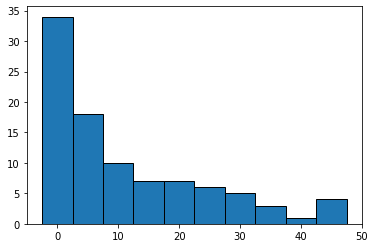

In [25]:
plt.hist(data=df, x='Length_of_reign', align='left', edgecolor='black')
plt.show()

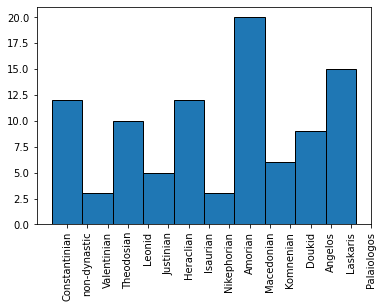

In [26]:
plt.hist(data=df, x='Dynasty', align='left', edgecolor='black')
plt.xticks(np.arange(16), rotation=90)
plt.show()

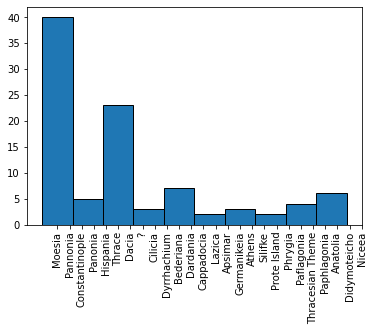

In [27]:
plt.hist(data=df, x='Location_of_birth', align='left', edgecolor='black')
plt.xticks(np.arange(26), rotation=90)
plt.show()

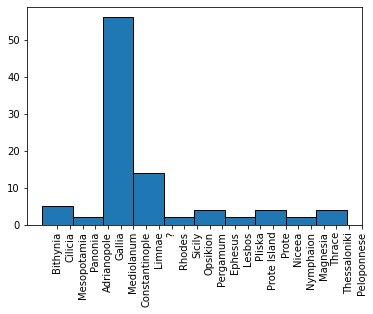

In [28]:
plt.hist(data=df, x='Location_of_death', align='left', edgecolor='black')
plt.xticks(np.arange(25), rotation=90)
plt.show()

In [29]:
df[df['Location_of_death'] == 'Constantinople']

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dynasty,Length_of_reign
Name,,,,,,,,,
Arcadius,395,408,377,408,Hispania,Constantinople,Natural Causes,Theodosian,13
Theodosius II,408,450,401,450,Constantinople,Constantinople,Accident,Theodosian,42
Marcian,450,457,396,457,Thrace,Constantinople,Illness,Theodosian,7
Leo I,457,474,401,474,Dacia,Constantinople,Illness,Leonid,17
Leo II,474,474,467,474,?,Constantinople,?,Leonid,0
Zeno,474,475,425,491,Cilicia,Constantinople,Natural Causes,Leonid,1
Zeno,476,491,425,491,Cilicia,Constantinople,Natural Causes,Leonid,15
Anastasius I,491,518,430,518,Dyrrhachium,Constantinople,Natural Causes,Leonid,27
Justinian I,527,565,482,565,Dardania,Constantinople,Natural Causes,Justinian,38


In [30]:
df[df['Cause_of_death'] == 'Murder']

,Start_of_reign,End_of_reign,Year_of_birth,Year_of_death,Location_of_birth,Location_of_death,Cause_of_death,Dynasty,Length_of_reign
Name,,,,,,,,,
Gratian,378,379,359,383,Panonia,Gallia,Murder,Valentinian,1
Maurice,582,602,539,602,Cappadocia,Constantinople,Murder,Justinian,20
Constans II,641,668,630,668,Constantinople,Sicily,Murder,Heraclian,27
Justinian II,685,695,669,711,Constantinople,Opsikion,Murder,Heraclian,10
Justinian II,705,711,669,711,Constantinople,Opsikion,Murder,Heraclian,6
Nikephoros II,963,969,912,969,Cappadocia,Constantinople,Murder,Macedonian,6
Romanos III,1028,1034,968,1034,Thracesian Theme,Constantinople,Murder,Macedonian,6
Alexius II,1180,1183,1169,1183,Constantinople,Constantinople,Murder,Komnenian,3
Andronikos I,1183,1185,1188,1185,Constantinople,Constantinople,Murder,Komnenian,2


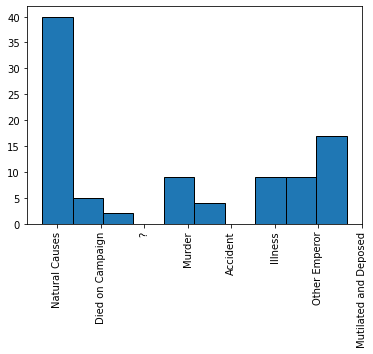

In [31]:
# most common cause of death is natural causes
plt.hist(data=df, x='Cause_of_death', align='left', edgecolor='black')
plt.xticks(np.arange(8), rotation=90)
plt.show()

([<matplotlib.axis.XTick at 0x7f7f11caffa0>,
 [Text(0, 0, 'Natural Causes'),
  Text(1, 0, 'Died on Campaign'),
  Text(2, 0, '?'),
  Text(3, 0, 'Murder'),
  Text(4, 0, 'Accident'),
  Text(5, 0, 'Illness'),
  Text(6, 0, 'Other Emperor'),
  Text(7, 0, 'Mutilated and Deposed')])

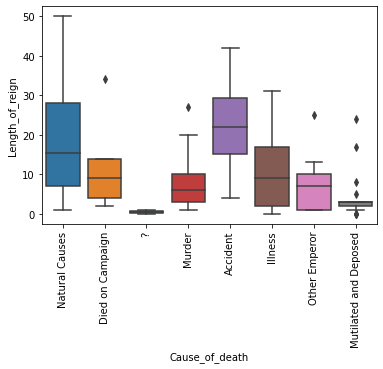

In [32]:
sns.boxplot(data=df, y='Length_of_reign', x='Cause_of_death')
plt.xticks(np.arange(8), rotation=90)

<AxesSubplot:xlabel='Location_of_death', ylabel='Length_of_reign'>

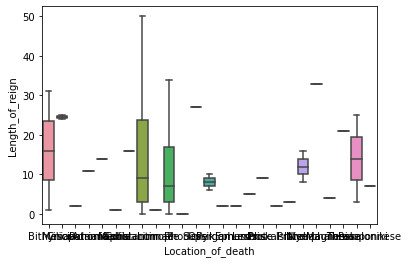

In [33]:
sns.boxplot(data=df, y='Length_of_reign', x='Location_of_death')

In [ ]:
sns.boxplot(data=df, y='Length_of_reign', x='Location_of_death')

# Exploration Summary
* 

# Modeling
* 